# Homework 4 - Time Series Analysis

**Dataset**: You will be working with a dataset containing historical stock price data for **Apple (AAPL)**. However, instead of providing the dataset directly, you will retrieve the data from a financial API.<br>
**Objective**: To apply your knowledge of time series analysis using Pandas by working on real-world data.

The `dataset` includes the following columns: 
* `timestamp`: The date of the stock price. 
* `open`: The opening price of the stock on that date. 
* `high`: The highest price of the stock during the day. 
* `low`: The lowest price of the stock during the day. 
* `close`: The closing price of the stock on that date. 
* `volume`: The trading volume of the stock on that date.


**API**: https://www.alphavantage.co/query <br>
**API Parameters**:
* function: TIME_SERIES_DAILY
* outputsize: full 
* datatype: csv<br>

**Sign up for an API key**: https://www.alphavantage.co/support/#api-key<br>
**Documentation**: https://www.alphavantage.co/documentation/#daily


In [2]:
import io
import requests
import pandas as pd

#### Task 1: Make an API request and retrieve historical stock price data for Apple (AAPL).

In [3]:
API_KEY = 'R8XHK8AH0MOJPGPR'
api = 'https://www.alphavantage.co/query'
payload = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'AAPL',
    'apikey': API_KEY,
    'outputsize': 'full',
    'datatype': 'csv'
}
response = requests.get(api, params=payload)

#### Task 2: Verify the status code of the API response to confirm the successful execution of the request.

In [4]:
response.status_code 

200

#### Task 3: Load the retrieved data into a Pandas DataFrame named `stock`.

In [5]:
stock = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

#### Task 4: Observe the first 15 entries.

In [6]:
stock.head(15)

,timestamp,open,high,low,close,volume
0,2023-09-29,172.02,173.070,170.341,171.21,51861083
1,2023-09-28,169.34,172.030,167.620,170.69,56294419
2,2023-09-27,172.62,173.040,169.050,170.43,66921808
3,2023-09-26,174.82,175.200,171.660,171.96,64588945
4,2023-09-25,174.20,176.970,174.150,176.08,46172740
5,2023-09-22,174.67,177.079,174.050,174.79,56725385
6,2023-09-21,174.55,176.300,173.860,173.93,63149116
7,2023-09-20,179.26,179.695,175.400,175.49,58436181
8,2023-09-19,177.52,179.630,177.130,179.07,51826941
9,2023-09-18,176.48,179.380,176.170,177.97,67257573


#### Task 5: Change the column name 'timestamp' to 'date'.

In [7]:
stock = stock.rename(columns={'timestamp':'date'})

#### Task 6: Set the 'date' column as the index of the DataFrame and ensure it's in datetime format.

In [8]:
stock.date = pd.to_datetime(stock.date)
stock = stock.set_index('date')

#### Task 7: Arrange the entries in the DataFrame in ascending order, from the oldest to the most recent.

In [9]:
stock = stock.sort_index(ascending=True)

#### Task 8: What is the difference in days between the most recent day and the oldest day?

In [10]:
stock.index = pd.to_datetime(stock.index)
stock
print((stock.index.max() - stock.index.min()).days,'days')

8733 days


#### Task 9: Plot the time series of 'close' prices over the entire period.

<AxesSubplot:xlabel='date'>

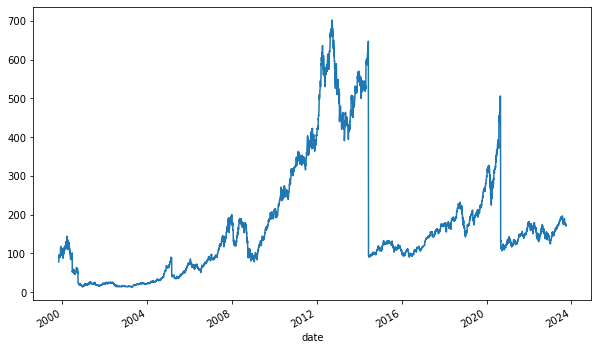

In [11]:
stock['close'].plot(figsize=(10,6))

#### Task 10: Identify the highest closing price recorded during the entire time frame, along with the corresponding date, and conduct online research to understand the event that triggered this notable price surge. Provide a concise summary of the event.

In [12]:
stock[stock['close']==stock['close'].max()]
#stock.iloc[stock['close'].argmax()]

,open,high,low,close,volume
date,,,,,
2012-09-19,700.26,703.99,699.57,702.1,11674100


IPhone 5 was released

#### Task 11: Resample the data at a different frequency, from daily to monthly. Calculate the mean 'close' price for each resampled period. Plot the resulting aggregated data.

date
1999-11-30     90.007143
1999-12-31    103.400000
2000-01-31    103.359500
2000-02-29    111.636000
2000-03-31    128.502609
                 ...    
2023-05-31    172.622500
2023-06-30    184.283333
2023-07-31    192.411500
2023-08-31    181.083696
2023-09-30    177.002500
Freq: M, Name: close, Length: 287, dtype: float64


<AxesSubplot:xlabel='date'>

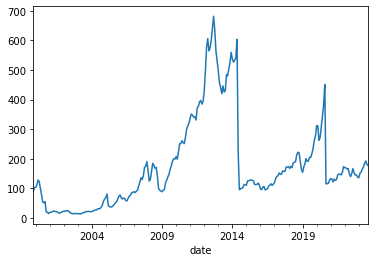

In [13]:
s = stock.resample('M')['close'].mean()
print(s)
s.plot()

#### Task 12: Which month experiences the highest trading volume on average?

In [14]:
stock.groupby(stock.index.month)['volume'].mean().idxmax()

9

#### Task 13: On which date was the greatest disparity between the opening and closing prices observed?

In [15]:
def disparity(stock):
    diff = abs(stock['open'] - stock['close'])
    return diff.idxmax()

result = disparity(stock)
stock[stock.index==result]
#stock.loc[abs((stock['open']-stock['close'])).idxmax()]

,open,high,low,close,volume
date,,,,,
2012-04-17,578.94,610.0,571.91,609.7,36626000


#### Task 14: What was the lowest opening price for each year?

In [16]:
stock.groupby(stock.index.year)['open'].min()

date
1999     78.00
2000     13.78
2001     14.50
2002     13.54
2003     12.99
2004     21.42
2005     34.20
2006     51.73
2007     83.00
2008     81.93
2009     79.45
2010    192.37
2011    316.68
2012    409.40
2013    387.97
2014     90.21
2015     94.87
2016     90.00
2017    115.80
2018    148.15
2019    143.98
2020    104.54
2021    119.03
2022    127.99
2023    126.01
Name: open, dtype: float64

#### Task 15: Produce a graph representing the high price column for the current month (09/2023). After analyzing this graph, would you consider purchasing or selling the stock?

<AxesSubplot:xlabel='date'>

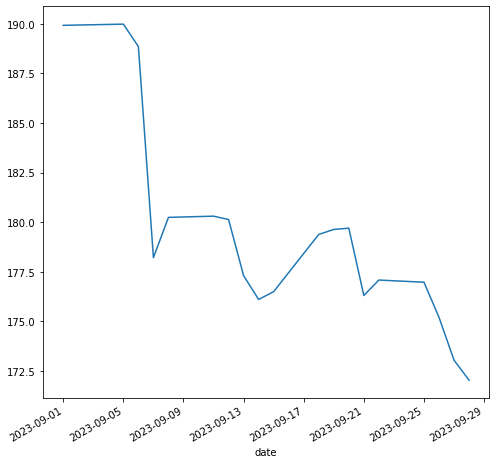

In [17]:
s = stock['2023-09-01':'2023-09-28']['high']
s.plot(figsize=(8,8))
#stock['2023-09-01':], will lead to most recent date instead of chosen date

I would definetley wait a little before purchasing in case it went down further but def wouldn't sell in case ot went back up

#### Task 16: What is the average low price over the past seven weeks?

In [18]:
#stock['2023-08-10':]['low'].mean()
stock.last('7W')['low'].mean()

176.42238235294118

#### Task 17: Calculate and visualize the rolling 30-day average volume.

<AxesSubplot:xlabel='date'>

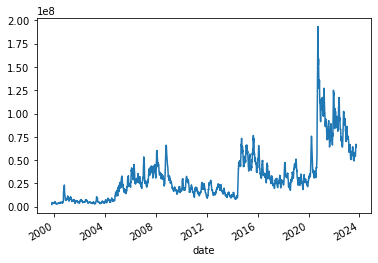

In [19]:
stock.rolling(window='30D')['volume'].mean().plot()

#### Task 18: Calculate the daily price changes for the 'close' column. Create a new column named 'PriceChange' to store these changes. Create a line plot (kind='line') to visualize the daily price changes over time.

              open    high      low   close    volume  PriceChange
date                                                              
1999-11-01   80.00   80.69   77.370   77.62   2487300          NaN
1999-11-02   78.00   81.69   77.310   80.25   3564600         2.63
1999-11-03   81.62   83.25   81.000   81.50   2932700         1.25
1999-11-04   82.06   85.37   80.620   83.62   3384700         2.12
1999-11-05   84.62   88.37   84.000   88.31   3721500         4.69
...            ...     ...      ...     ...       ...          ...
2023-09-25  174.20  176.97  174.150  176.08  46172740         1.29
2023-09-26  174.82  175.20  171.660  171.96  64588945        -4.12
2023-09-27  172.62  173.04  169.050  170.43  66921808        -1.53
2023-09-28  169.34  172.03  167.620  170.69  56294419         0.26
2023-09-29  172.02  173.07  170.341  171.21  51861083         0.52

[6017 rows x 6 columns]


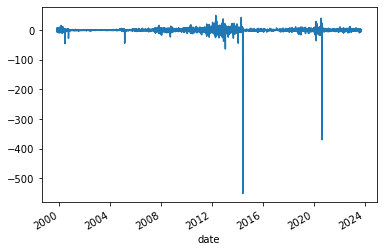

In [20]:
stock['PriceChange'] = stock['close'].diff()
stock['PriceChange'].plot(kind='line')
print(stock)

#### Task 19: Answer the following questions (based on task 18):
* On which date did the largest negative daily price change occur, and what was the magnitude of the decrease?
* What significant events or occurrences took place on that particular date that could potentially account for the observed change?

In [21]:
stock[stock['PriceChange']==stock['PriceChange'].min()]
#stock.loc[stock["PriceChange"].idxmin()]

,open,high,low,close,volume,PriceChange
date,,,,,,
2014-06-09,92.7,93.88,91.75,93.7,75414997,-551.87


Apple's stock split

#### Task 20: Create your own question and answer it.

#### Compute the expanding sum and mean of the data frame since this day in 2000 and present and visualize it

AxesSubplot(0.125,0.2;0.775x0.68)


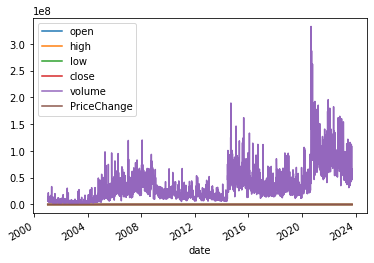

In [33]:
s = stock.last('23Y')
s.expanding().agg(['sum', 'mean'])
print(s.plot())